In [1]:
# load csv into pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\Ronald\\Documents\\EECS_731\\Homework_5\\historical_product_demand.csv', nrows=10000)
df.dropna()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
Product_Code        10000 non-null object
Warehouse           10000 non-null object
Product_Category    10000 non-null object
Date                10000 non-null object
Order_Demand        10000 non-null int64
dtypes: int64(1), object(4)
memory usage: 390.7+ KB


In [2]:
# feature engineering
# explore various features and values
# get a feel for the distribution within features

In [3]:
df['Product_Code'].value_counts()

Product_1359    624
Product_1570    169
Product_1274    138
Product_1439    119
Product_0033    117
Product_1341    116
Product_1281    112
Product_1432    109
Product_1278     98
Product_1431     97
Product_1295     94
Product_1350     93
Product_1574     93
Product_1393     90
Product_0620     89
Product_1247     85
Product_0031     85
Product_1342     81
Product_1394     78
Product_0642     78
Product_1451     77
Product_1904     73
Product_1270     69
Product_1372     68
Product_1356     68
Product_1264     66
Product_0608     61
Product_0943     60
Product_1023     59
Product_1970     58
               ... 
Product_0411      1
Product_0229      1
Product_0541      1
Product_0719      1
Product_1463      1
Product_0170      1
Product_0185      1
Product_1193      1
Product_0432      1
Product_1346      1
Product_0443      1
Product_1742      1
Product_0384      1
Product_1344      1
Product_0113      1
Product_0343      1
Product_1523      1
Product_0922      1
Product_1632      1


In [4]:
df['Warehouse'].value_counts()

Whse_J    4579
Whse_S    3687
Whse_C    1734
Name: Warehouse, dtype: int64

In [5]:
df['Product_Category'].value_counts()

Category_019    5243
Category_005     898
Category_001     521
Category_007     468
Category_009     468
Category_006     428
Category_021     340
Category_023     323
Category_024     299
Category_030     227
Category_020     183
Category_028     176
Category_022     129
Category_011     107
Category_026      65
Category_015      46
Category_033      29
Category_003      24
Category_032      18
Category_004       4
Category_018       3
Category_013       1
Name: Product_Category, dtype: int64

In [6]:
# noticed that 'datetime' column is not the first column
# move 'datetime' to first column to able to work with different plot tools
# replace original float objects in 'Date' column with datetime objects

from datetime import datetime
Dates = []
for date in df['Date']:
    dates = str(date).replace("/","-")
    Dates.append(dates)
df = df.drop('Date', axis=1)
df.insert(0,'Date', Dates, allow_duplicates=False)
df.Date = pd.to_datetime(df.Date)
df.to_csv('C:\\Users\\Ronald\\Documents\\EECS_731\\Homework_5\\model_data.csv')
df.head()

,Date,Product_Code,Warehouse,Product_Category,Order_Demand
0,2012-07-27,Product_0993,Whse_J,Category_028,100
1,2012-01-19,Product_0979,Whse_J,Category_028,500
2,2012-02-03,Product_0979,Whse_J,Category_028,500
3,2012-02-09,Product_0979,Whse_J,Category_028,500
4,2012-03-02,Product_0979,Whse_J,Category_028,500


In [7]:
# look at the order demand for all products with all features

Text(0,0.5,'Demand')

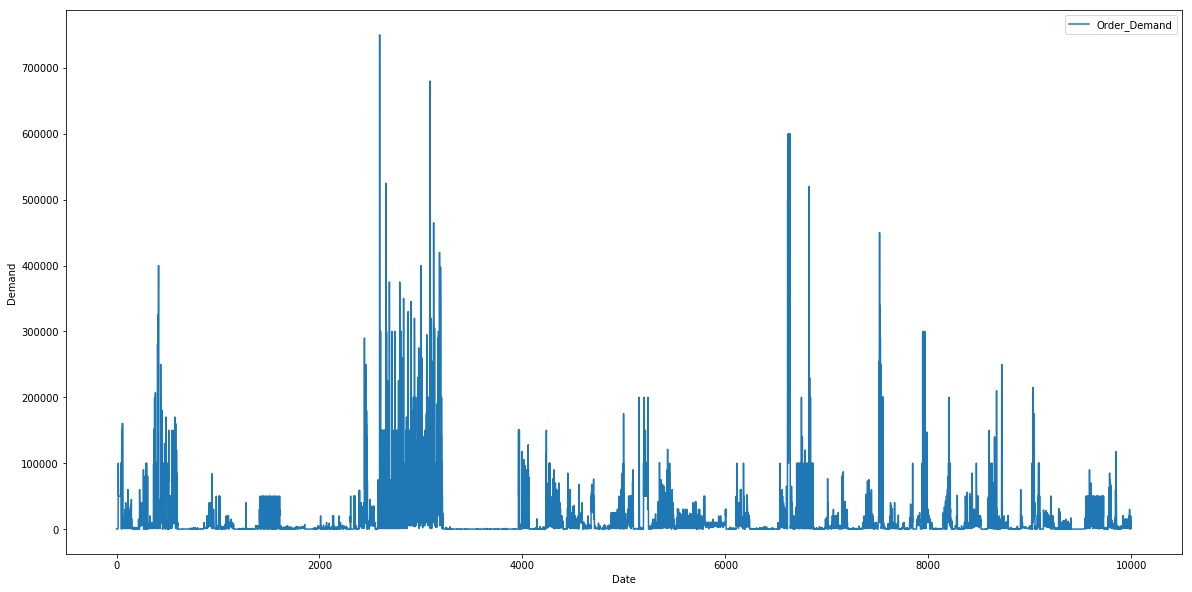

In [8]:
df[['Order_Demand']].plot(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Demand')

In [ ]:
# provides a good initial look at the order demand, but still not able to see 
# all the values clearly due to large range among values

Text(0,0.5,'Demand')

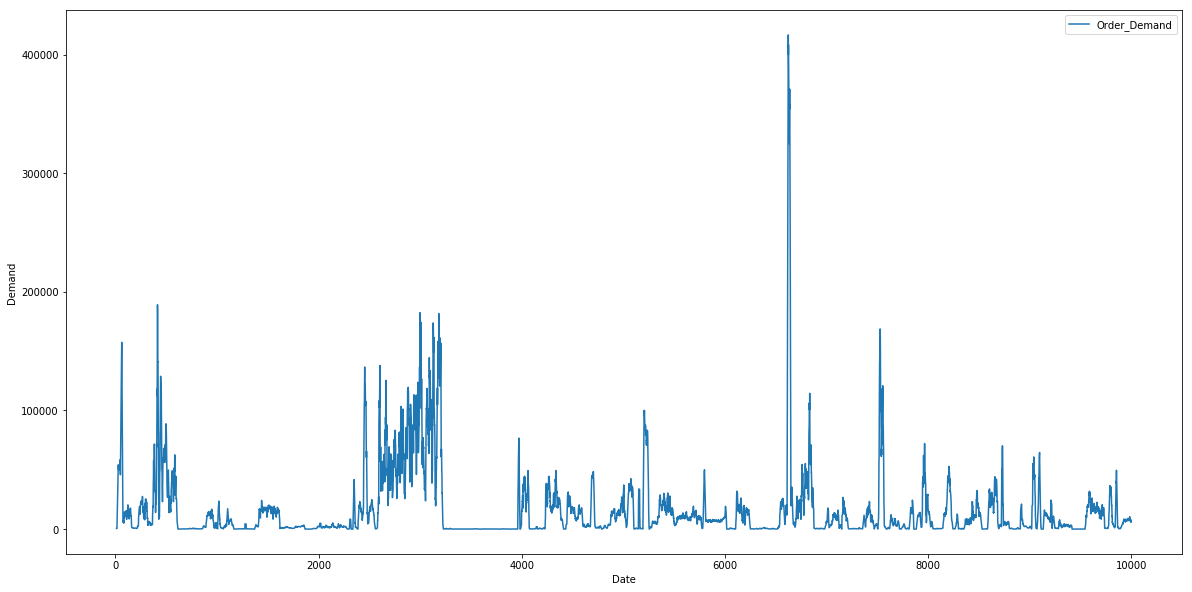

In [9]:
# look at the rolling average of the order demand of all products with all features
order_demand = df[['Order_Demand']]
order_demand.rolling(12).mean().plot(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Demand')

In [ ]:
# provides a better look at all the values

C:\Users\Ronald\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Ronald\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if sys.path[0] == '':


Text(0,0.5,'Demand')

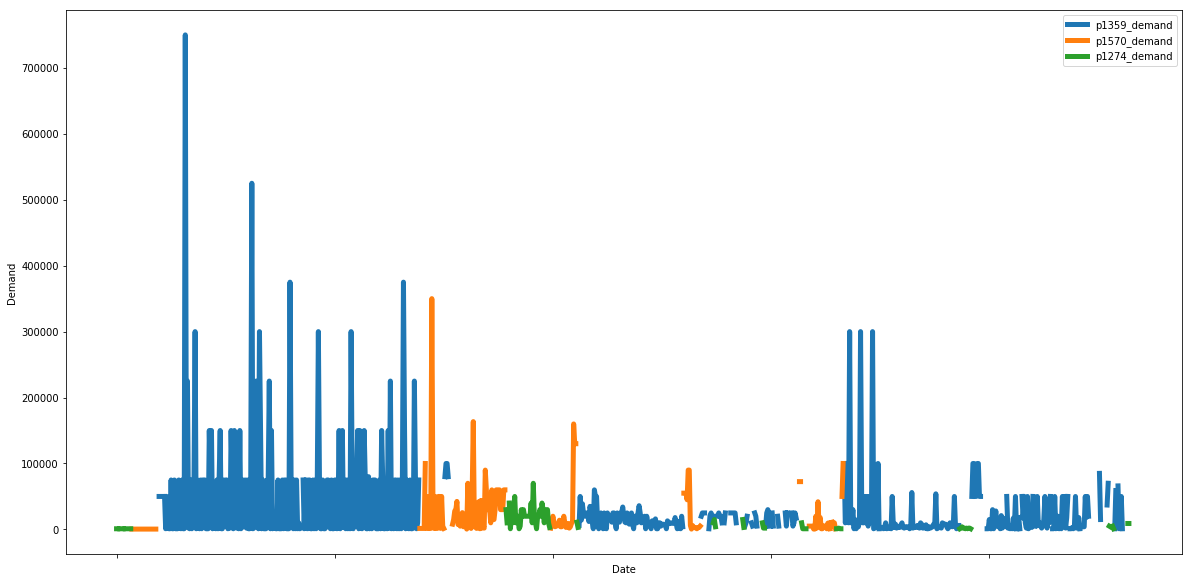

In [11]:
# look at the order demand with respect to the 3 most frequently occuring products in dataframe 
# (Product_1359, Product_1570, Product_1274, etc.)
p1359 = df[df.Product_Code == 'Product_1359']
p1359.rename(index=str, columns={"Order_Demand": "p1359_demand"}, inplace=True)
p1570 = df[df.Product_Code == 'Product_1570']
p1570.rename(index=str, columns={"Order_Demand": "p1570_demand"}, inplace=True)
p1274 = df[df.Product_Code == 'Product_1274']
p1274.rename(index=str, columns={"Order_Demand": "p1274_demand"}, inplace=True)

# plot
p_1359 = p1359[['p1359_demand']]
p_1570 = p1570[['p1570_demand']]
p_1274 = p1274[['p1274_demand']]
df_combo = pd.concat([p_1359, p_1570, p_1274], axis=1)
df_combo.plot(figsize=(20,10), linewidth=5)
plt.xlabel('Date')
plt.ylabel('Demand')

In [ ]:
# can see jumps in values due to products not being ordered on a specific date
# product 1359 has significantly more orders than product 1570 and product 1274
# on average, the order demand for product 1359 is higher than product 1570 and product 1274
# the overall order demand for each product is decreasing over the years 

C:\Users\Ronald\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Ronald\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  del sys.path[0]


Text(0,0.5,'Demand')

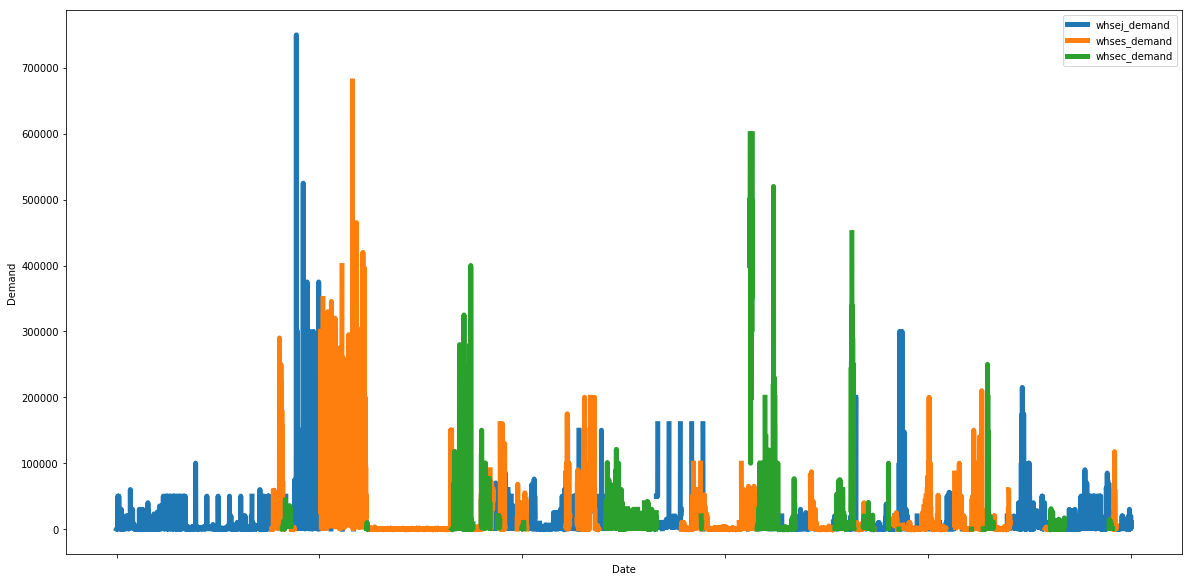

In [12]:
# look at the order demand with respect to the 3 most frequently occuring warehouses in dataframe (Whse_J, Whse_S, Whse_C, etc.)
whsej = df[df.Warehouse == 'Whse_J']
whsej.rename(index=str, columns={"Order_Demand": "whsej_demand"}, inplace=True)
whses = df[df.Warehouse == 'Whse_S']
whses.rename(index=str, columns={"Order_Demand": "whses_demand"}, inplace=True)
whsec = df[df.Warehouse == 'Whse_C']
whsec.rename(index=str, columns={"Order_Demand": "whsec_demand"}, inplace=True)

# plot
whse_j = whsej[['whsej_demand']]
whse_s = whses[['whses_demand']]
whse_c = whsec[['whsec_demand']]
df_combo = pd.concat([whse_j, whse_s, whse_c], axis=1)
df_combo.plot(figsize=(20,10), linewidth=5)
plt.xlabel('Date')
plt.ylabel('Demand')

In [ ]:
# again, can see jumps in values due to products not being ordered on a specific date
# good balanced number of values for each warehouse
# the overall order demand with respect to warehouse j and warehouse s is decreasing over the years
# the overall order demand with respect to warehouse s increased for in earlier years, then decreased in later years 

C:\Users\Ronald\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\Ronald\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  del sys.path[0]


Text(0,0.5,'Demand')

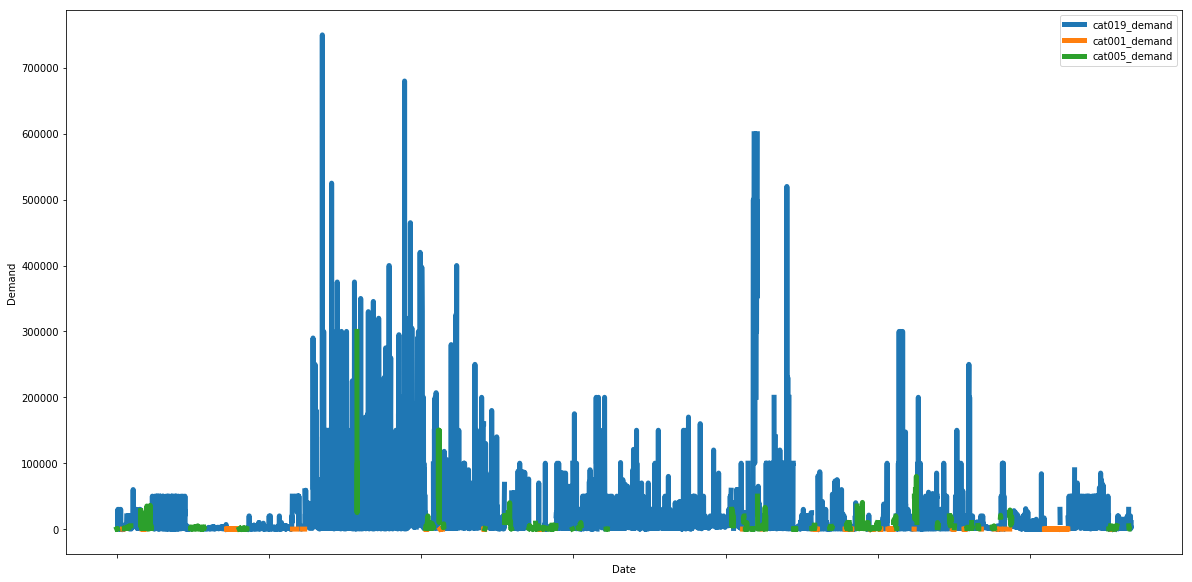

In [13]:
# look at the order demand with respect to the 3 most frequently occuring product categories in dataframe
# (Category_019, Category_005, Category_001, etc.)
cat019 = df[df.Product_Category == 'Category_019']
cat019.rename(index=str, columns={"Order_Demand": "cat019_demand"}, inplace=True)
cat005 = df[df.Product_Category == 'Category_005']
cat005.rename(index=str, columns={"Order_Demand": "cat005_demand"}, inplace=True)
cat001 = df[df.Product_Category == 'Category_001']
cat001.rename(index=str, columns={"Order_Demand": "cat001_demand"}, inplace=True)

# plot
cat_019 = cat019[['cat019_demand']]
cat_005 = cat005[['cat005_demand']]
cat_001 = cat001[['cat001_demand']]
df_combo = pd.concat([cat_019, cat_001, cat_005], axis=1)
df_combo.plot(figsize=(20,10), linewidth=5)
plt.xlabel('Date')
plt.ylabel('Demand')

In [ ]:
# again, can see jumps in values due to products not being ordered on a specific date
# category 019 has significantly more values than category 005 and category 001
# order demand with respect to category 019 is decreasing over the years
# can't gain much info about order demand with respect to category 005 or category 001

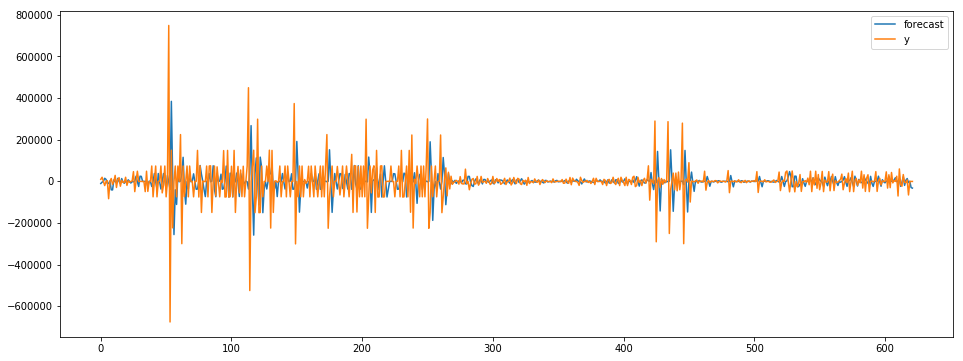

In [14]:
# ARIMA
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

# plot the forecast for the order demand with respect to the 3 most frequently occuring products

# Product 1359
rcParams['figure.figsize'] = 16, 6
model = ARIMA(p1359['p1359_demand'].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
result.plot_predict()
plt.show()

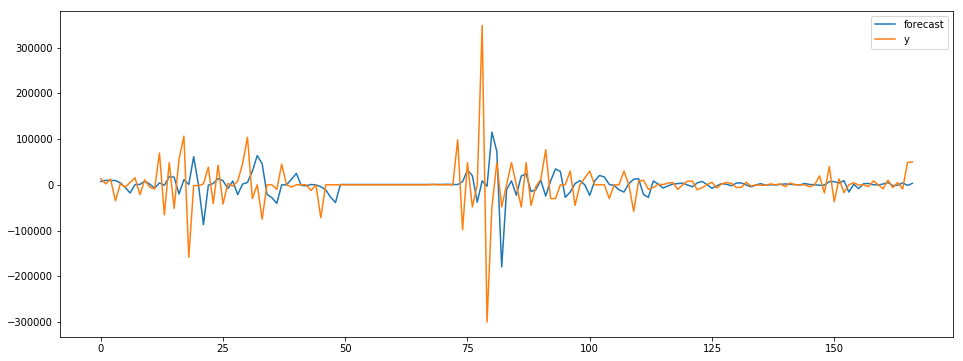

In [15]:
# Product 1570
rcParams['figure.figsize'] = 16, 6
model = ARIMA(p1570['p1570_demand'].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
result.plot_predict()
plt.show()

In [ ]:
# forecast is underpredicting actual values

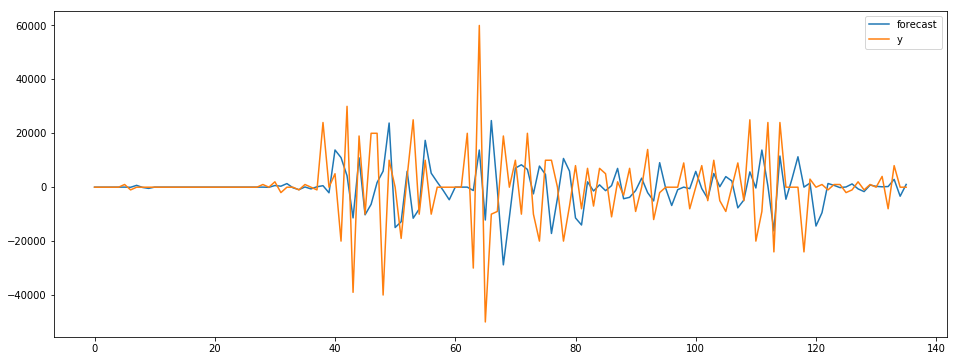

In [16]:
# Product 1274
rcParams['figure.figsize'] = 16, 6
model = ARIMA(p1274['p1274_demand'].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
result.plot_predict()
plt.show()

In [ ]:
# forecast is underpredicting actual values

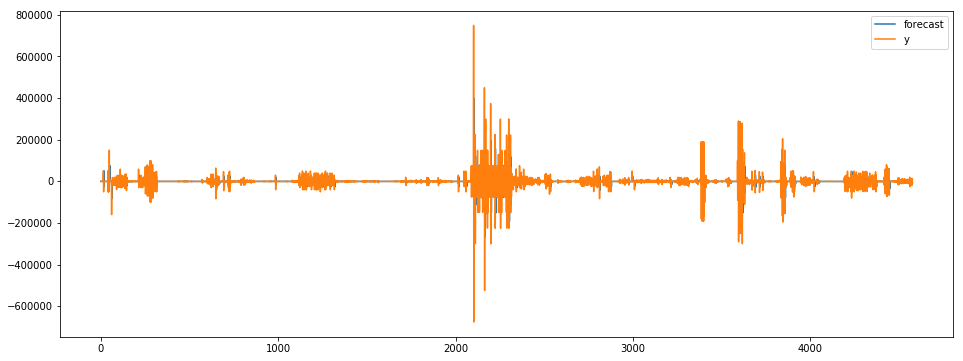

In [17]:
# ARIMA
# plot the forecast for the order demand with respect to the 3 most frequently occuring warehouses
# Warehouse J
rcParams['figure.figsize'] = 16, 6
model = ARIMA(whsej["whsej_demand"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
result.plot_predict()
plt.show()

In [ ]:
# forecast is underpredicting actual values

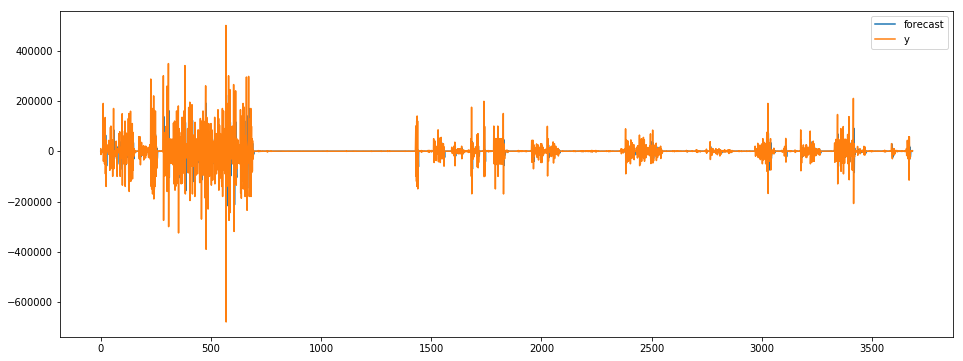

In [18]:
# Warehouse S
rcParams['figure.figsize'] = 16, 6
model = ARIMA(whses["whses_demand"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
result.plot_predict()
plt.show()

In [ ]:
# forecast is underpredicting actual values

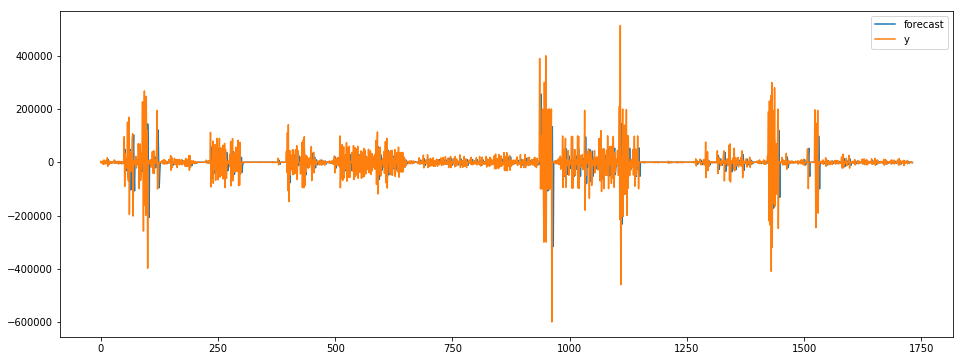

In [19]:
# Warehouse C
rcParams['figure.figsize'] = 16, 6
model = ARIMA(whsec["whsec_demand"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
result.plot_predict()
plt.show()

In [ ]:
# forecast is underpredicting actual values

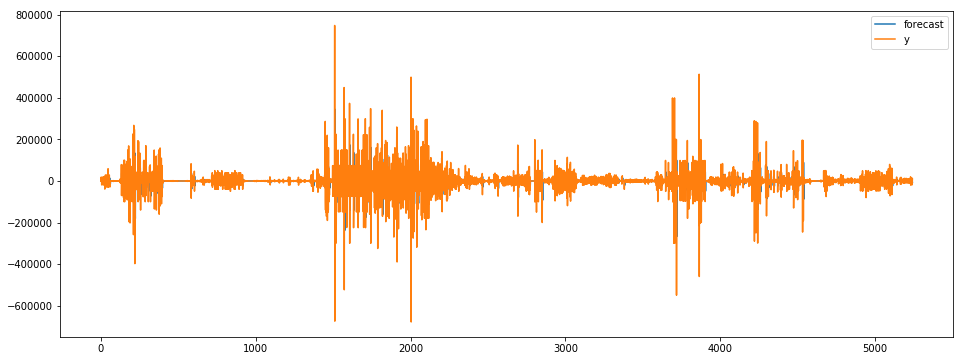

In [20]:
# ARIMA
# # plot the forecast for the order demand with respect to the 3 most frequently occuring product categories
# Category 019
rcParams['figure.figsize'] = 16, 6
model = ARIMA(cat019['cat019_demand'].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
result.plot_predict()
plt.show()

In [ ]:
# forecast is underpredicting actual values

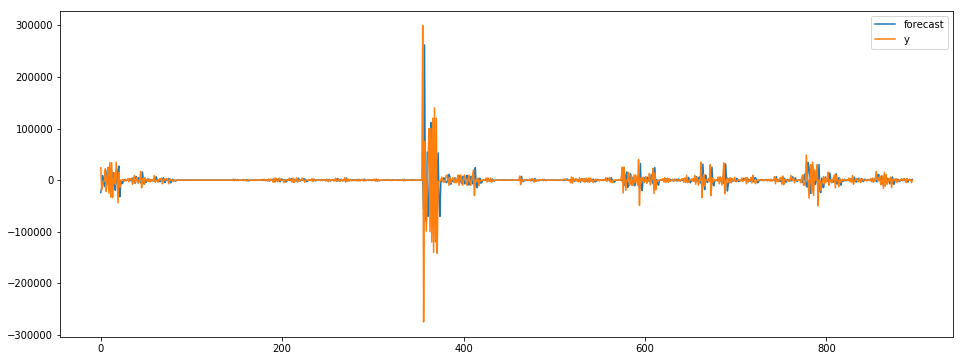

In [21]:
# Category 005
rcParams['figure.figsize'] = 16, 6
model = ARIMA(cat005['cat005_demand'].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
result.plot_predict()
plt.show()

In [ ]:
# forecast is underpredicting actual values

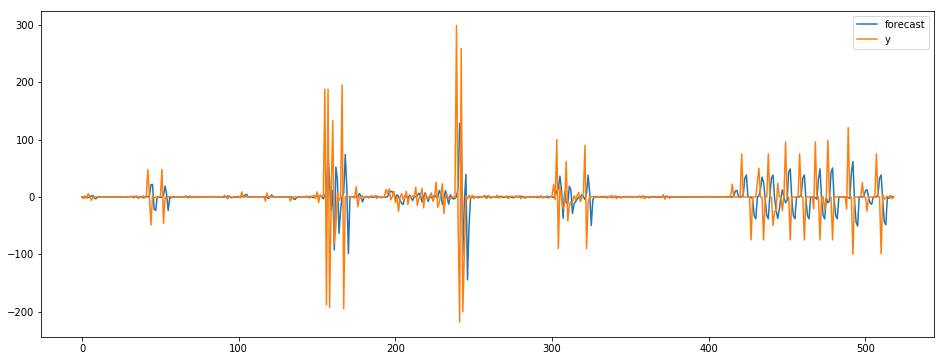

In [22]:
# Category 001
rcParams['figure.figsize'] = 16, 6
model = ARIMA(cat001['cat001_demand'].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
result.plot_predict()
plt.show()

In [ ]:
# forecast is underpredicting actual values

In [ ]:
# Discussion

# There are not many features in the dataset.  However, this a large dataset that needed to be reduced 
# in order to properly explore various features
# There is opportunity for feature engineering by splitting the 'Date' feauture into more features
# The basic plots provide a decent picture of the trends in order demand
# Overall, the ARIMA model seems to underpredict the order demand for a product with respect to different features